In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
import seaborn as sns


df = pd.read_csv("csv/listings.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3850 non-null   int64  
 1   listing_url                                   3850 non-null   object 
 2   scrape_id                                     3850 non-null   int64  
 3   last_scraped                                  3850 non-null   object 
 4   name                                          3850 non-null   object 
 5   description                                   3818 non-null   object 
 6   neighborhood_overview                         2851 non-null   object 
 7   picture_url                                   3850 non-null   object 
 8   host_id                                       3850 non-null   int64  
 9   host_url                                      3850 non-null   o

In [2]:
#We're dropping the nan's in "Bathrooms_text" column
df = df.dropna(axis = 0, subset = ['bathrooms_text'])
df = df.dropna(axis = 0, subset = ['beds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 3849
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3747 non-null   int64  
 1   listing_url                                   3747 non-null   object 
 2   scrape_id                                     3747 non-null   int64  
 3   last_scraped                                  3747 non-null   object 
 4   name                                          3747 non-null   object 
 5   description                                   3720 non-null   object 
 6   neighborhood_overview                         2831 non-null   object 
 7   picture_url                                   3747 non-null   object 
 8   host_id                                       3747 non-null   int64  
 9   host_url                                      3747 non-null   o

In [3]:
#Creating new lists to replace the "bathroom_text"
baths = []
private = []
for i in  df["bathrooms_text"]:
    split = i.split()

    if split[0] == "Shared":
        baths.append(1)
    elif split[0] == "Half-bath":
        baths.append(1)
    else:
        baths.append(float(split[0]))
    if "shared" in split:
        private.append("shared")
    elif "private" in split:
        private.append("private")
    else:
        private.append("private")


In [4]:
#We are adding the new rows
df["n_bathrooms"] = baths
df["shared_private"] = private
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 3849
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3747 non-null   int64  
 1   listing_url                                   3747 non-null   object 
 2   scrape_id                                     3747 non-null   int64  
 3   last_scraped                                  3747 non-null   object 
 4   name                                          3747 non-null   object 
 5   description                                   3720 non-null   object 
 6   neighborhood_overview                         2831 non-null   object 
 7   picture_url                                   3747 non-null   object 
 8   host_id                                       3747 non-null   int64  
 9   host_url                                      3747 non-null   o

In [5]:
# Fill blank spaces in bedrooms with a 1
df["bedrooms"].fillna(value = 1, inplace = True)
df["reviews_per_month"].fillna(value = 0, inplace = True)

In [6]:
df["price"]
pricev2 = []
for i in df["price"]:
    j = i.split("$")
    aux = j[1].replace(",","")
    pricev2.append(float(aux))
#print(pricev2)
df["price"] = pricev2

In [7]:
df.corr()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_bathrooms
id,1.000000,NaN,0.422255,0.178150,0.178150,NaN,-0.019233,-0.014227,0.011114,NaN,...,-0.084948,-0.103964,-0.065970,-0.149130,0.236389,0.223915,0.074413,-0.040948,-0.033346,0.025395
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.422255,NaN,1.000000,0.071625,0.071625,NaN,-0.011802,0.063303,0.007813,NaN,...,-0.151816,-0.171221,-0.108799,-0.191024,0.269442,0.230158,0.196928,-0.017853,-0.022224,-0.007157
host_listings_count,0.178150,NaN,0.071625,1.000000,1.000000,NaN,0.009916,-0.003308,-0.059377,NaN,...,-0.046886,-0.115092,-0.045661,-0.091521,0.641473,0.649273,-0.025582,-0.008765,-0.070767,-0.016377
host_total_listings_count,0.178150,NaN,0.071625,1.000000,1.000000,NaN,0.009916,-0.003308,-0.059377,NaN,...,-0.046886,-0.115092,-0.045661,-0.091521,0.641473,0.649273,-0.025582,-0.008765,-0.070767,-0.016377
neighbourhood_group_cleansed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.019233,NaN,-0.011802,0.009916,0.009916,NaN,1.000000,0.049166,0.065485,NaN,...,0.033293,0.028695,0.030671,0.026104,0.045772,0.044152,0.006037,-0.008210,0.044962,0.051617
longitude,-0.014227,NaN,0.063303,-0.003308,-0.003308,NaN,0.049166,1.000000,-0.036005,NaN,...,-0.075830,-0.043183,-0.052619,-0.010024,-0.061367,-0.082757,0.105545,-0.021976,-0.010725,0.012631
accommodates,0.011114,NaN,0.007813,-0.059377,-0.059377,NaN,0.065485,-0.036005,1.000000,NaN,...,0.033720,0.013379,-0.021000,0.014447,-0.104486,-0.075215,-0.134755,-0.066843,0.046886,0.622744
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 3849
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3747 non-null   int64  
 1   listing_url                                   3747 non-null   object 
 2   scrape_id                                     3747 non-null   int64  
 3   last_scraped                                  3747 non-null   object 
 4   name                                          3747 non-null   object 
 5   description                                   3720 non-null   object 
 6   neighborhood_overview                         2831 non-null   object 
 7   picture_url                                   3747 non-null   object 
 8   host_id                                       3747 non-null   int64  
 9   host_url                                      3747 non-null   o

In [9]:
df2 = df.drop(columns = ["id", "listing_url", "scrape_id", "last_scraped", "name","neighborhood_overview", "picture_url", "host_id", "host_name", "host_since", "host_location",
                        "host_url", "host_about", "host_response_rate", "host_thumbnail_url", "host_picture_url", "host_listings_count", "host_verifications", "host_identity_verified", "host_neighbourhood",
                        "neighbourhood","neighbourhood_group_cleansed", "latitude", "longitude", "bathrooms", "license", "instant_bookable", "calculated_host_listings_count",
                        "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms",
                        "bathrooms_text" ,"minimum_minimum_nights", "maximum_minimum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm",
                        'availability_60', 'availability_90', 'availability_365', 'review_scores_accuracy',
                       'review_scores_cleanliness', 'review_scores_checkin',
                        'review_scores_communication', 'review_scores_location',
                       'review_scores_value', 'reviews_per_month','calendar_updated', 'has_availability', 'availability_30','calendar_last_scraped','number_of_reviews_ltm'])
df2.columns

Index(['description', 'host_response_time', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'number_of_reviews', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating', 'n_bathrooms',
       'shared_private'],
      dtype='object')

In [10]:
df2.columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 3849
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   description                3720 non-null   object 
 1   host_response_time         3074 non-null   object 
 2   host_acceptance_rate       3226 non-null   object 
 3   host_is_superhost          3747 non-null   object 
 4   host_total_listings_count  3747 non-null   int64  
 5   host_has_profile_pic       3747 non-null   object 
 6   neighbourhood_cleansed     3747 non-null   object 
 7   property_type              3747 non-null   object 
 8   room_type                  3747 non-null   object 
 9   accommodates               3747 non-null   int64  
 10  bedrooms                   3747 non-null   float64
 11  beds                       3747 non-null   float64
 12  amenities                  3747 non-null   object 
 13  price                      3747 non-null   float

In [11]:
df2.dtypes.value_counts()


object     12
float64     7
int64       6
dtype: int64

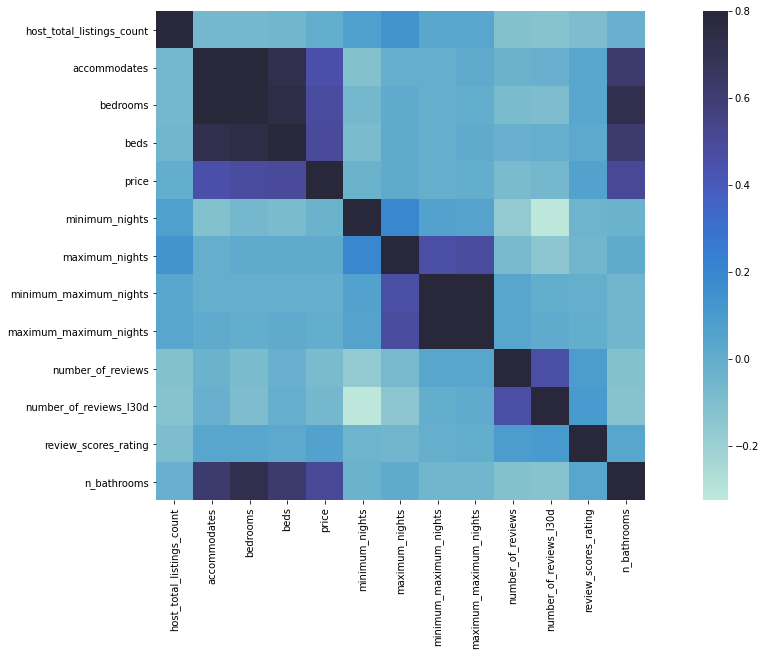

In [12]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(21, 9))
sns.heatmap(corrmat, vmax=.8, square=True, center=1);

In [13]:
n_unique_neighborhoods = df2['neighbourhood_cleansed'].unique().size
print(n_unique_neighborhoods)
df2.columns
df.columns

78


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [14]:
# import colorcet as cc
# import seaborn as sns
# palette = sns.color_palette(cc.glasbey, n_colors=n_unique_neighborhoods)
# #trying to find where the coordinates belong from the latitude and longitude
# sns.set(rc={"figure.figsize": (21, 9)})
# ax=sns.scatterplot(data=df2, x="longitude", y="latitude",hue='neighbourhood_cleansed', palette=palette)
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=4)
# ax.set_title('Location Co-ordinates')

/Users/kevinvo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

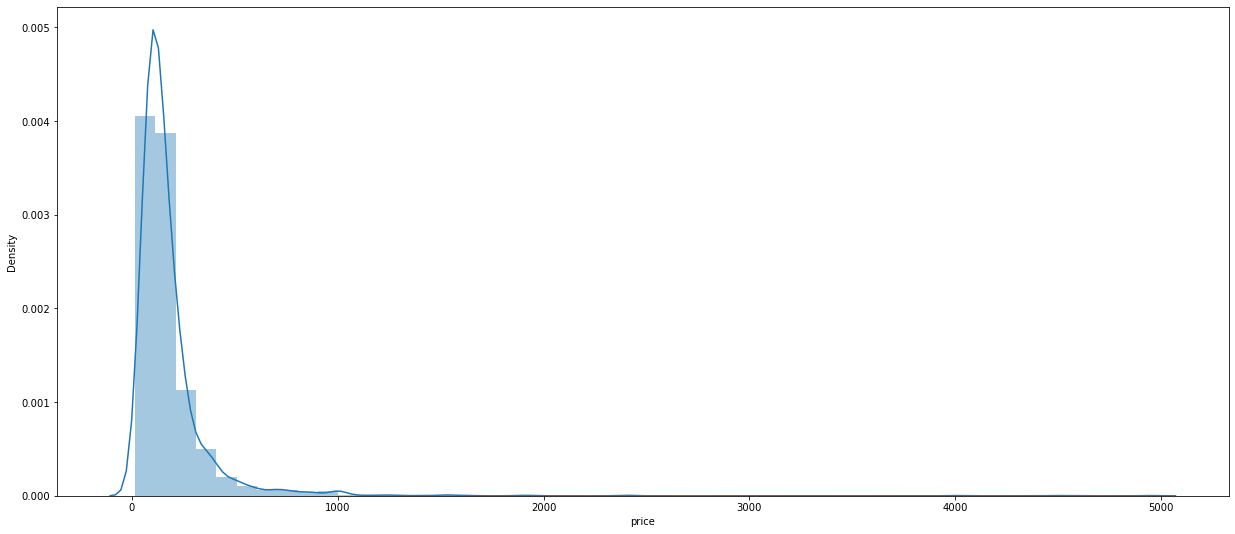

In [15]:
fig, ax = plt.subplots(figsize=(21,9))
sns.distplot(df2['price'])

In [16]:

upper_quartile=df2['price'].describe()['75%']
lower_quartile=df2['price'].describe()['25%']
IQR = upper_quartile-lower_quartile
upper_outliers = upper_quartile + 1.5*IQR
lower_outliers = lower_quartile - 1.5*IQR 
print(lower_outliers)
print(upper_outliers)
print(df2['price'].describe())

-75.0
365.0
count    3747.000000
mean      178.865759
std       208.147332
min        15.000000
25%        90.000000
50%       130.000000
75%       200.000000
max      4950.000000
Name: price, dtype: float64


/Users/kevinvo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

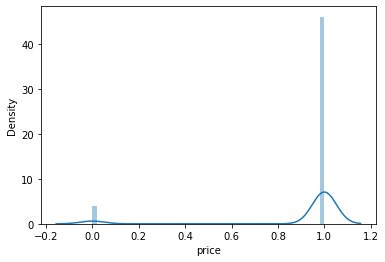

In [17]:
sns.distplot(df2['price'] <= upper_outliers)

/Users/kevinvo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

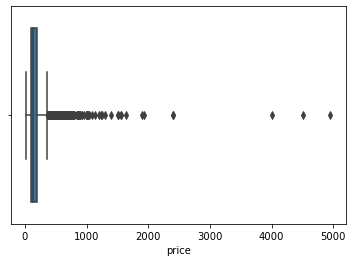

In [18]:
sns.boxplot(df2['price']) #box plot on adr column to check for high range & low range outliers

In [19]:
df2.to_csv('csv/listings_cleaned.csv', index=False)
#readded 1 attribute: 'description'

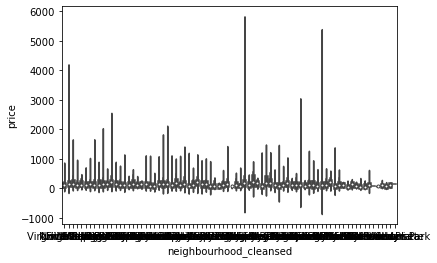

In [20]:
ax=sns.violinplot(x='neighbourhood_cleansed',y='price',data=df2)